In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
import cv2
import tifffile

In [18]:
def get_list_of_files(address):
    
    files_m = glob.glob(os.path.join(address,"*_MSI.tif"))
    files_r = glob.glob(os.path.join(address,"*_RGB.tif"))

    return sorted(files_m),sorted(files_r)

files_m,files_r=get_list_of_files('/data/Public Data/IEEE Data Fusion Contest 2019/DFC2019_track1_trainval/Test-Track1/')

In [19]:
len(files_m)

50

In [20]:
os.path.split(files_m[0])

('/data/Public Data/IEEE Data Fusion Contest 2019/DFC2019_track1_trainval/Test-Track1',
 'JAX_160_001_MSI.tif')

In [21]:
img=tifffile.imread(files_m[0]).astype(int)
img.shape

(1024, 1024, 8)

In [22]:
img_rgb=tifffile.imread(files_r[0])

In [23]:
from tqdm import tqdm
for i in tqdm(range(len(files_m))):
    img=tifffile.imread(files_m[i]).astype(int)
    ndvi=(img[:,:,6]-img[:,:,4])/(img[:,:,6]+img[:,:,4])
    ndwi=(img[:,:,2]-img[:,:,6])/(img[:,:,2]+img[:,:,6])
    _,fileabasename=os.path.split(files_m[i])
    ndvi_filename=fileabasename[:-8]+'_NDVI.tif'
    ndwi_filename=fileabasename[:-8]+'_NDWI.tif'
    tifffile.imsave(os.path.join('/data/Public Data/IEEE Data Fusion Contest 2019/DFC2019_track1_trainval/Test_Index/'+ndvi_filename),ndvi) 
    tifffile.imsave(os.path.join('/data/Public Data/IEEE Data Fusion Contest 2019/DFC2019_track1_trainval/Test_Index/'+ndwi_filename),ndwi) 

 20%|██        | 10/50 [00:04<00:16,  2.39it/s]/home/sigma_wd/anaconda3/envs/pytorch/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/sigma_wd/anaconda3/envs/pytorch/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
 74%|███████▍  | 37/50 [00:16<00:07,  1.72it/s]/home/sigma_wd/anaconda3/envs/pytorch/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/sigma_wd/anaconda3/envs/pytorch/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
100%|██████████| 50/50 [00:24<00:00,  1.72it/s]


In [15]:
fileabasename

'JAX_004_006_MSI.tif'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Truth-color')

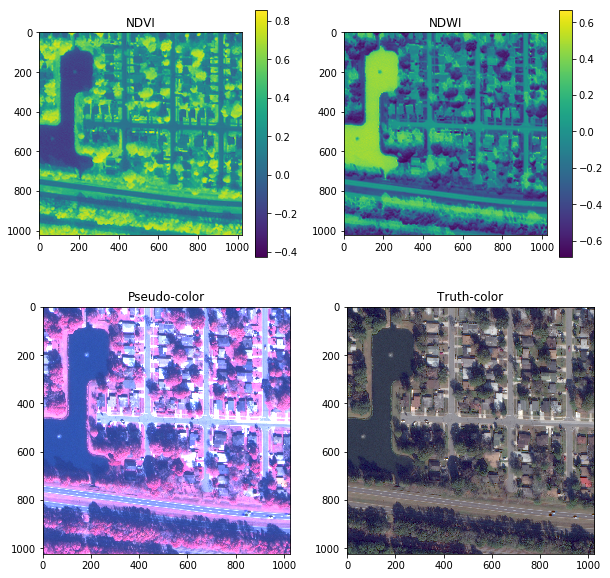

In [49]:
plt.figure(1,figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(ndvi)
plt.title('NDVI')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(ndwi)
plt.title('NDWI')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(img[:,:,[5,3,2]])
plt.title('Pseudo-color')

plt.subplot(2,2,4)
plt.imshow(img_rgb)
plt.title('Truth-color')

In [ ]:
print()

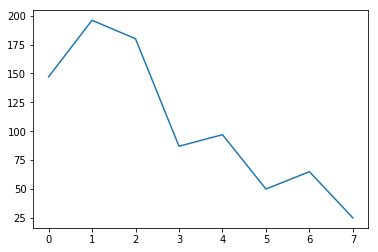

In [31]:
plt.plot(img[200,200,:])

In [7]:
ndvi=(img[:,:,6]-img[:,:,4])/(img[:,:,6]+img[:,:,4])

In [9]:
print(ndvi.min())

-0.43005181347150256


In [36]:
red=img_rgb[:,:,0]
print(red)

[[233 233 232 ... 138 153 148]
 [234 235 235 ... 145 159 150]
 [236 237 237 ... 152 166 155]
 ...
 [108 110 106 ... 108  92  72]
 [111 115 108 ... 100  86  67]
 [103 108 107 ... 101  90  75]]


In [28]:
for j in range(8):
    print(img[:,:,j]/256,'band',j)

[[0.59765625 0.63671875 0.6953125  ... 0.61328125 0.65234375 0.6328125 ]
 [0.58203125 0.640625   0.7109375  ... 0.58984375 0.5625     0.5390625 ]
 [0.56640625 0.69140625 0.6875     ... 0.56640625 0.5390625  0.50390625]
 ...
 [0.53125    0.546875   0.56640625 ... 0.6328125  0.6015625  0.60546875]
 [0.53125    0.6015625  0.671875   ... 0.625      0.62109375 0.6015625 ]
 [0.54296875 0.6484375  0.71484375 ... 0.58203125 0.62109375 0.6015625 ]] band 0
[[0.859375   0.91015625 0.9765625  ... 0.83203125 0.88671875 0.8671875 ]
 [0.84765625 0.9140625  1.         ... 0.79296875 0.7578125  0.73828125]
 [0.828125   0.99609375 0.9609375  ... 0.75390625 0.72265625 0.6875    ]
 ...
 [0.6875     0.703125   0.73046875 ... 0.87109375 0.82421875 0.82421875]
 [0.6953125  0.78125    0.86328125 ... 0.859375   0.84375    0.81640625]
 [0.71484375 0.84765625 0.9296875  ... 0.78515625 0.828125   0.80078125]] band 1
[[0.8125     0.84375    0.90234375 ... 0.7890625  0.83203125 0.84375   ]
 [0.80078125 0.8515625  0